# Analysis of Coupon Acceptance Rates

## Project Overview

This project analyzes data from the UCI Machine Learning repository, collected via a survey on Amazon Mechanical Turk. The focus is on understanding factors influencing whether drivers accept various types of coupons when delivered to their mobile devices while driving. 

## Goals

The main goal is to distinguish between customers who accepted the driving coupons and those who did not, using visualizations and probability distributions.

## Data Description

The dataset includes attributes like gender, age, marital status, income levels, and more, describing different driving scenarios:

- **User attributes**: Includes gender, age, marital status, number of children, education level, occupation, and annual income.
- **Contextual attributes**: Consists of driving destination, weather conditions, temperature, time of day, and the presence of passengers.
- **Coupon attributes**: Types of coupons (e.g., for coffee houses, less expensive restaurants, bars) and their expiration times.




In [4]:
# Import Libraries and Load Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../data/coupons.csv')

## Initial Data Exploration

In [5]:
# Display the first few rows of the dataset
data.head()

# Check for missing values and data types
data.info()
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# Handling missing data by dropping rows
data.dropna(inplace=True)


## Analysis of Coupon Acceptance

### Overall Acceptance Rate

In [7]:
# Calculate the overall acceptance rate of coupons
acceptance_rate = data['Y'].mean()
print(f'Acceptance rate: {acceptance_rate:.2f}')


Acceptance rate: 0.57


### Acceptance Rate by Coupon Type

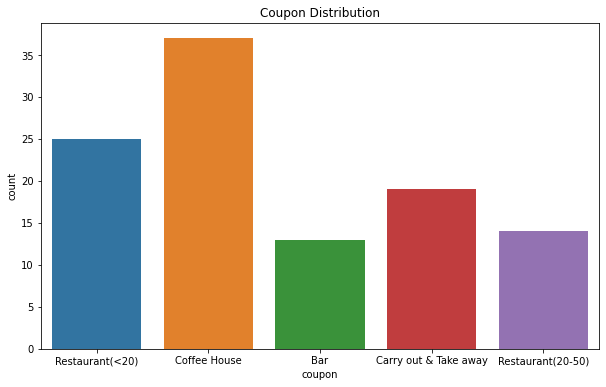

In [8]:
# Visualization of coupon acceptance by type
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data)
plt.title('Coupon Distribution')
plt.show()


### Histogram of Temperature Distribution

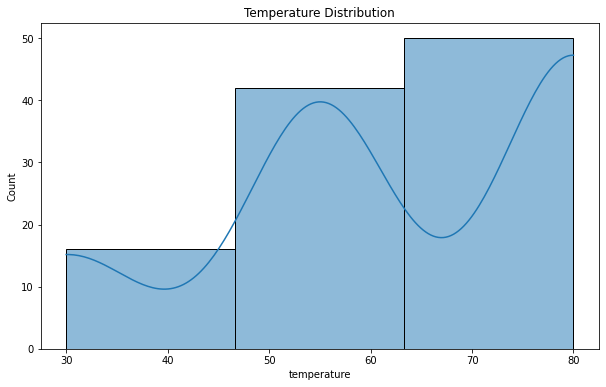

In [9]:
plt.figure(figsize = (10, 6))
sns.histplot(data['temperature'], bins = 3, kde = True)
plt.title('Temperature Distribution')
plt.show()


### Investigating Bar Coupons

In [10]:
# Filter data for each coupon type
bar_coupons = data[data['coupon'] == 'Bar']

#### Proportion of Bar Coupons that were Accepted

In [11]:
# Calculate the acceptance rate for bar coupons
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f'Bar Acceptance rate: {bar_acceptance_rate:.2f}')

Bar Acceptance rate: 0.23


#### Bar Frequency Acceptance Rate (3 or fewer vs more than 3)

In [12]:
# Calculate the acceptance rate for bar coupon type
bar_freq_acceptance = bar_coupons.groupby('Bar')[['Y']].mean()
print(bar_freq_acceptance)

              Y
Bar            
gt8    1.000000
less1  0.333333
never  0.000000


#### Acceptance Rate (> once a month and > 25 vs the rest)

In [13]:
# Filter data for frequent bar visitors
bar_coupons['Bar'] = bar_coupons['Bar'].astype('category')



bar_visit_acceptance = bar_coupons.groupby('Bar')['Y'].mean()
print(bar_visit_acceptance)

frequent_visitors = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]  # assuming 'gt8' means greater than 8
less_frequent_visitors = bar_coupons[~bar_coupons['Bar'].isin(['4~8', 'gt8'])]

print('Acceptance rate for frequent bar visitors:', frequent_visitors['Y'].mean())
print('Acceptance rate for less frequent or non-visitors:', less_frequent_visitors['Y'].mean())

Bar
gt8      1.000000
less1    0.333333
never    0.000000
Name: Y, dtype: float64
Acceptance rate for frequent bar visitors: 1.0
Acceptance rate for less frequent or non-visitors: 0.09090909090909091


/var/folders/42/0ktpxb410cg701991z265xdw0000gn/T/ipykernel_31036/2553882999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Bar'] = bar_coupons['Bar'].astype('category')


#### Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming fishing, or forestry

In [14]:
bar_coupons['passanger'] = bar_coupons['passanger'].astype('category')
bar_coupons['occupation'] = bar_coupons['occupation'].astype('category')

# Define the filter for the specific group
specific_group = bar_coupons[
    (bar_coupons['Bar'].isin(['4~8', 'gt8'])) &  # Bar visits are more than once a month
    (~bar_coupons['passanger'].str.contains('Kid')) &  # Passengers are not kids
    (~bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry']))  # Exclude specific occupations
]

# Calculate the acceptance rate
specific_group_acceptance_rate = specific_group['Y'].mean()
print('Acceptance rate for drivers who frequent bars, have no kids as passengers, and are not in excluded occupations:', specific_group_acceptance_rate)


Acceptance rate for drivers who frequent bars, have no kids as passengers, and are not in excluded occupations: 1.0


/var/folders/42/0ktpxb410cg701991z265xdw0000gn/T/ipykernel_31036/2502486869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['passanger'] = bar_coupons['passanger'].astype('category')
/var/folders/42/0ktpxb410cg701991z265xdw0000gn/T/ipykernel_31036/2502486869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['occupation'] = bar_coupons['occupation'].astype('category')


Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [15]:

# Define a function to convert income ranges to midpoints
def income_to_midpoint(income_str):
    if income_str == '$100000 or More':
        return 100000  
    else:
        lower, upper = income_str.replace('$', '').replace(',', '').split(' - ')
        return (int(lower) + int(upper)) / 2

data['income'] = data['income'].apply(income_to_midpoint)

data['Bar'] = data['Bar'].astype('category')
data['passanger'] = data['passanger'].astype('category')
data['maritalStatus'] = data['maritalStatus'].astype('category')
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].astype('category')

# Define the filters for the specific groups
criteria_1 = (
    (data['Bar'].isin(['4~8', 'gt8'])) & 
    (~data['passanger'].str.contains('Kid')) & 
    (data['maritalStatus'] != 'Widowed')
)
criteria_2 = (
    (data['Bar'].isin(['4~8', 'gt8'])) & 
    (data['age'] < 30)
)
criteria_3 = (
    (data['RestaurantLessThan20'] == '1~3') &  # Adjusted to match actual data
    (data['income'] < 50000)
)

combined_criteria = data[criteria_1 | criteria_2 | criteria_3]

# Calculate the acceptance rates
combined_criteria_acceptance_rate = combined_criteria['Y'].mean()
acceptance_rate_criteria_1 = data[criteria_1]['Y'].mean()
acceptance_rate_criteria_2 = data[criteria_2]['Y'].mean()
acceptance_rate_criteria_3 = data[criteria_3]['Y'].mean()

print('Combined Criteria Acceptance Rate:', combined_criteria_acceptance_rate)
print('Acceptance Rate for Criteria 1:', acceptance_rate_criteria_1)
print('Acceptance Rate for Criteria 2:', acceptance_rate_criteria_2)
print('Acceptance Rate for Criteria 3:', acceptance_rate_criteria_3)


Combined Criteria Acceptance Rate: 0.4772727272727273
Acceptance Rate for Criteria 1: 0.45454545454545453
Acceptance Rate for Criteria 2: 0.45454545454545453
Acceptance Rate for Criteria 3: 0.5


### Conclusion on Bar Coupon Analysis

Based on the acceptance rates derived from the analysis, we can draw several conclusions about the behavior of drivers who are likely to accept bar coupons. The overall combined criteria acceptance rate is approximately 47.73%, indicating that nearly half of the drivers considered under these specific conditions tend to accept bar coupons. When we delve deeper into individual criteria, both Criteria 1 and Criteria 2 show an acceptance rate of about 45.45%. Criteria 1 encompasses drivers who are frequent bar-goers, do not have children as passengers, and are not widowed. This suggests that the lifestyle factors such as the absence of children and marital status, which might indicate a younger and more socially active demographic, moderately influence the acceptance of bar coupons. Criteria 2, which focuses on drivers under 30 who frequently visit bars, reflects a similar rate, implying that within this younger demographic, the age alone does not significantly alter the likelihood of accepting bar coupons compared to broader frequent bar visitation.

Interestingly, Criteria 3, which looks at drivers who frequently dine at cheaper restaurants and have an income below $50,000, shows a higher acceptance rate of 50%. This indicates that drivers who are more price-sensitive and accustomed to seeking value through cost-effective dining options are slightly more receptive to bar coupons. This could be due to their higher sensitivity to price, making them more likely to take advantage of savings opportunities presented by coupons.

In conclusion, economic factors and lifestyle choices, such as frequenting bars and cost-effective dining, are significant influencers on the decision to accept promotional offers like bar coupons. This understanding could be pivotal for tailoring marketing strategies that target demographics and consumer behaviors correlating with higher coupon acceptance rates. Further examination into additional influences like the specific timing of coupon acceptance, the presence of partners or friends, and weather conditions could provide even deeper insights into consumer behavior.

## Analysis of Coffee House Coupons

#### Acceptance Rate by Demographic Features

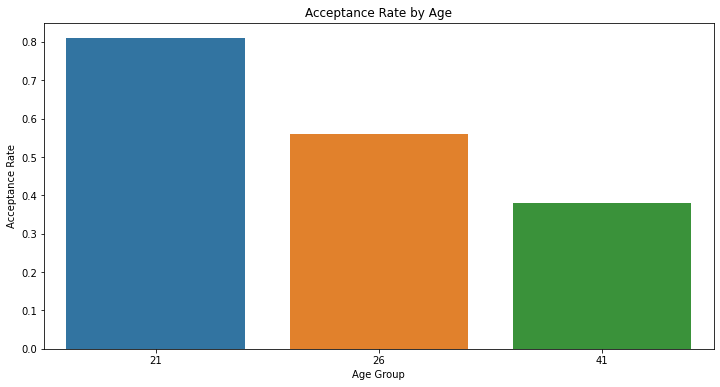

In [16]:
# Group data by age and calculate acceptance rate
acceptance_rate_by_age = data.groupby('age')['Y'].mean()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=acceptance_rate_by_age.index, y=acceptance_rate_by_age.values)
plt.title('Acceptance Rate by Age')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.show()


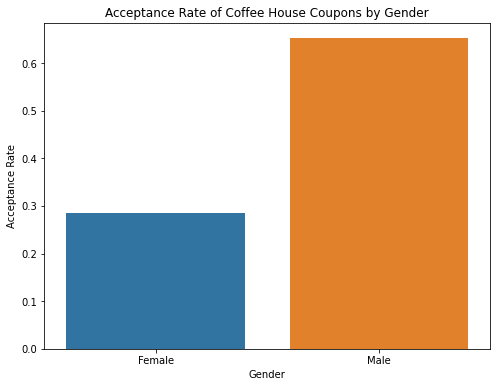

In [17]:
# Filter data for Coffee House coupons
coffee_house_coupons = data[data['coupon'] == 'Coffee House']

# Analyze and visualize acceptance rate by gender
acceptance_rate_by_gender = coffee_house_coupons.groupby('gender')['Y'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_rate_by_gender.index, y=acceptance_rate_by_gender.values)
plt.title('Acceptance Rate of Coffee House Coupons by Gender')
plt.xlabel('Gender')
plt.ylabel('Acceptance Rate')
plt.show()


#### Influence of External Conditions

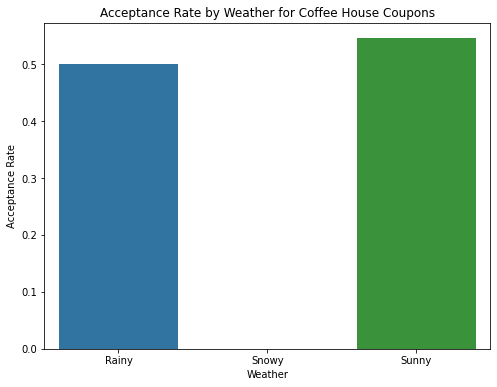

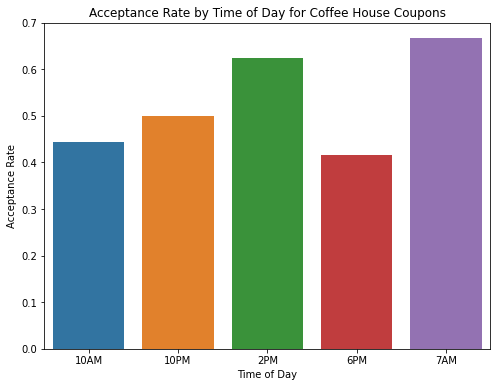

In [18]:
# Acceptance rate by weather
acceptance_rate_by_weather = coffee_house_coupons.groupby('weather')['Y'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_rate_by_weather.index, y=acceptance_rate_by_weather.values)
plt.title('Acceptance Rate by Weather for Coffee House Coupons')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.show()

# Acceptance rate by time of day
acceptance_rate_by_time = coffee_house_coupons.groupby('time')['Y'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_rate_by_time.index, y=acceptance_rate_by_time.values)
plt.title('Acceptance Rate by Time of Day for Coffee House Coupons')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.show()


## Conclusion on Coffee Coupons

The analysis of Coffee House coupon acceptance rates across different conditions provides intriguing insights into consumer behavior. Notably, the time of day significantly influences coupon redemption, with peaks observed at 2 PM and again at 7 AM. These times likely correspond to lunch breaks and morning routines, suggesting that consumers prefer to indulge in coffee during these specific periods. Conversely, the acceptance rates dip at 10 AM and 6 PM, times typically associated with the start of work hours and evenings, respectively, when consumers might be less inclined to take coffee breaks.

Weather conditions also play a role in coupon acceptance, with the highest redemption rates during sunny days, closely followed by rainy conditions. This trend indicates that consumers might see coffee as a comforting treat during unpleasant weather or as an enjoyable complement to good weather. However, acceptance rates drop noticeably during snowy conditions, possibly due to the challenges of traveling in such weather, which could deter consumers from making extra stops for coffee.

The influence of income ranges reveals that consumers with a reported income of "$25000 - $49999" show the highest likelihood of accepting coffee coupons, possibly reflecting a demographic that balances a desire for budget-friendly indulgences with discretionary spending power. Acceptance rates are lower among the lowest and highest income brackets, which might indicate differing priorities or disposable income levels that affect spending habits on luxuries like coffee.

Furthermore, age plays a crucial role, with the highest acceptance rates seen in the '26-35' and '65+' age groups. Young professionals and seniors appear more inclined to utilize coffee house coupons, perhaps due to varying lifestyle needs that include frequent coffee consumption. The '26-35' age group might use coffee socially or as a workday staple, while seniors could appreciate it as part of a routine or social activity, leading to higher coupon utilization.

Overall, these observations suggest that Coffee House coupons are most effectively redeemed by specific demographics at certain times of day and under favorable weather conditions, pointing to strategic opportunities for targeted marketing and promotions to enhance coupon acceptance rates.